# Colormap reference

FanInSAR provides four well-known colormap categories, including:

- **SCM**: Scientific Colour Maps (SCM) is a set of perceptually uniform and color-vision deficiency friendly palettes designed for scientific visualization. These color maps ensure that visual errors are minimized, preventing distortion of underlying data and misleading the reader. (See [here](https://www.fabiocrameri.ch/colourmaps.php) for more information.)
- **GMT**: Colormaps from the Generic Mapping Tools (GMT) software package. (See [here](https://docs.generic-mapping-tools.org/6.3/cookbook/cpts.html) for more information.)
- **cmocean**: cmocean contains colormaps for commonly-used oceanographic variables. Most of the colormaps started from matplotlib colormaps, but have now been adjusted using the viscm tool to be perceptually uniform.(See [here](https://matplotlib.org/cmocean/) for more information.)
- **colorcet**: A collection of perceptually accurate 256-color colormaps for use with Python plotting programs like Bokeh, Matplotlib, HoloViews, and Datashader. (See [here](https://colorcet.holoviz.org/) for more information.)


## Useage

In FanInSAR, the colormap can be accessed by attributes of ``faninsar.cmaps`` module. For example, to use the ``earth`` colormap of ``GMT``, you can use the following code:

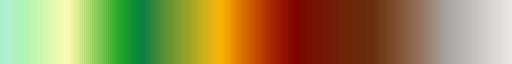

In [8]:
from faninsar import cmaps

cmaps.GMT.earth

Or directly use the colormap name as the attribute of ``cmaps``

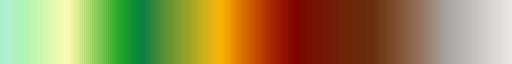

In [9]:
cmaps.earth

Like common colormaps, the colormaps in FanInSAR can be reversed by appending ``_r`` to the name of any built-in colormap. For example, to use the reversed ``earth`` colormap of ``GMT``, you can use the following code:

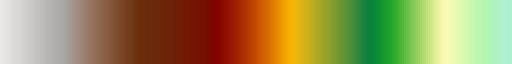

In [10]:
cmaps.earth_r

You can use the colormap in FanInSAR as the same as the colormaps in Matplotlib. For example, to use the ``earth`` colormap of ``GMT`` in Matplotlib, you can use the following code:

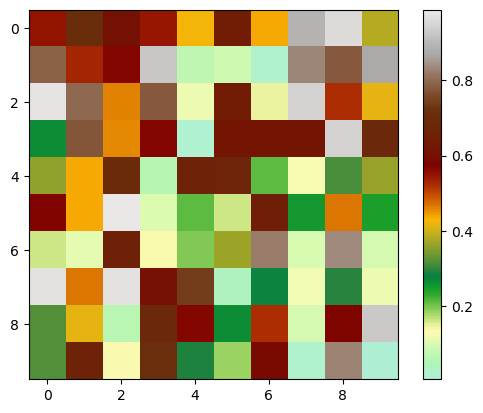

In [11]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
arr = np.random.rand(10, 10)
plt.imshow(arr, cmap=cmaps.earth)
plt.colorbar()

## Colormap list

The following table lists all the colormaps available in FanInSAR.

In [12]:
print(cmaps.names)

['RdGyBu', 'acton', 'bam', 'bamako', 'bamO', 'batlow', 'batlowK', 'batlowW', 'berlin', 'bilbao', 'broc', 'brocO', 'buda', 'bukavu', 'cork', 'corkO', 'davos', 'devon', 'fes', 'glasgow', 'grayC', 'hawaii', 'imola', 'lajolla', 'lapaz', 'lisbon', 'lipari', 'managua', 'navia', 'nuuk', 'oleron', 'oslo', 'roma', 'romaO', 'tofino', 'tokyo', 'turku', 'vanimo', 'vik', 'vikO', 'acton_r', 'bam_r', 'bamako_r', 'bamO_r', 'batlow_r', 'batlowK_r', 'batlowW_r', 'berlin_r', 'bilbao_r', 'broc_r', 'brocO_r', 'buda_r', 'bukavu_r', 'cork_r', 'corkO_r', 'davos_r', 'devon_r', 'fes_r', 'glasgow_r', 'grayC_r', 'hawaii_r', 'imola_r', 'lajolla_r', 'lapaz_r', 'lisbon_r', 'lipari_r', 'managua_r', 'navia_r', 'nuuk_r', 'oleron_r', 'oslo_r', 'roma_r', 'romaO_r', 'tofino_r', 'tokyo_r', 'turku_r', 'vanimo_r', 'vik_r', 'vikO_r', 'abyss', 'bathy', 'cool', 'copper', 'cubhelix', 'cyclic', 'dem1', 'dem2', 'dem3', 'dem4', 'drywet', 'earth', 'elevation', 'etopo1', 'geo', 'globe', 'gray', 'haxby', 'hot', 'inferno', 'jet', 'magm

or get a categories list by: 

In [13]:
print(cmaps.GMT.names)

['abyss', 'bathy', 'cool', 'copper', 'cubhelix', 'cyclic', 'dem1', 'dem2', 'dem3', 'dem4', 'drywet', 'earth', 'elevation', 'etopo1', 'geo', 'globe', 'gray', 'haxby', 'hot', 'inferno', 'jet', 'magma', 'nighttime', 'no_green', 'ocean', 'plasma', 'polar', 'rainbow', 'red2green', 'relief', 'seafloor', 'sealand', 'seis', 'split', 'srtm', 'terra', 'topo', 'turbo', 'viridis', 'world', 'wysiwyg']


In [14]:
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh, left=0.2, right=0.99)

    axs[0].set_title(f"{cmap_category} colormaps", fontsize=14)

    for ax, cmap_name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect="auto", cmap=getattr(cmaps, cmap_name))
        ax.text(-0.01, 0.5, cmap_name, va="center", ha="right", fontsize=10, transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

### SCM colormaps

['acton', 'bam', 'bamako', 'bamO', 'batlow', 'batlowK', 'batlowW', 'berlin', 'bilbao', 'broc', 'brocO', 'buda', 'bukavu', 'cork', 'corkO', 'davos', 'devon', 'fes', 'glasgow', 'grayC', 'hawaii', 'imola', 'lajolla', 'lapaz', 'lisbon', 'lipari', 'managua', 'navia', 'nuuk', 'oleron', 'oslo', 'roma', 'romaO', 'tofino', 'tokyo', 'turku', 'vanimo', 'vik', 'vikO']


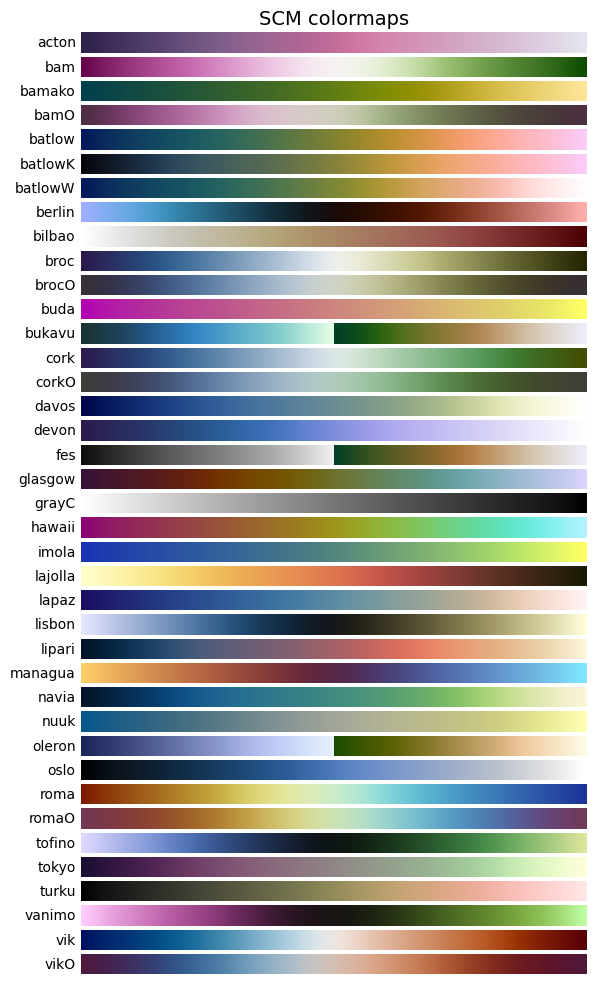

In [15]:
cmap_list = [i for i in cmaps.SCM.names if not i.endswith("_r")]
plot_color_gradients("SCM", cmap_list)
print(cmap_list)

### GMT colormaps

['abyss', 'bathy', 'cool', 'copper', 'cubhelix', 'cyclic', 'dem1', 'dem2', 'dem3', 'dem4', 'drywet', 'earth', 'elevation', 'etopo1', 'geo', 'globe', 'gray', 'haxby', 'hot', 'inferno', 'jet', 'magma', 'nighttime', 'no_green', 'ocean', 'plasma', 'polar', 'rainbow', 'red2green', 'relief', 'seafloor', 'sealand', 'seis', 'split', 'srtm', 'terra', 'topo', 'turbo', 'viridis', 'world', 'wysiwyg']


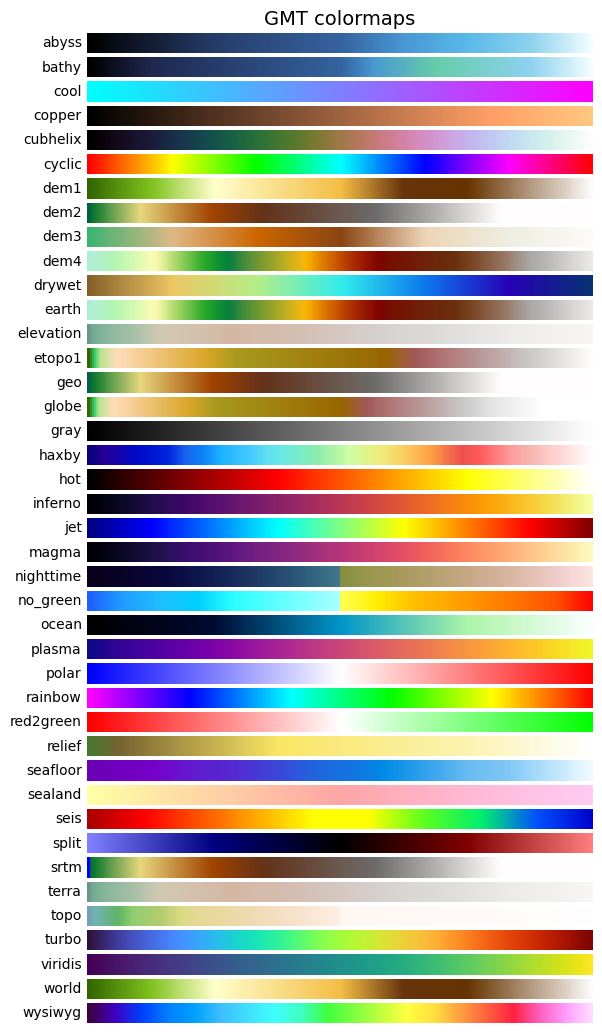

In [16]:
cmap_list = [i for i in cmaps.GMT.names if not i.endswith("_r")]
plot_color_gradients("GMT", cmap_list)
print(cmap_list)

### cmocean colormaps

['algae', 'amp', 'balance', 'curl', 'deep', 'delta', 'dense', 'diff', 'gray', 'haline', 'ice', 'matter', 'oxy', 'phase', 'rain', 'solar', 'speed', 'tarn', 'tempo', 'thermal', 'topo', 'turbid']


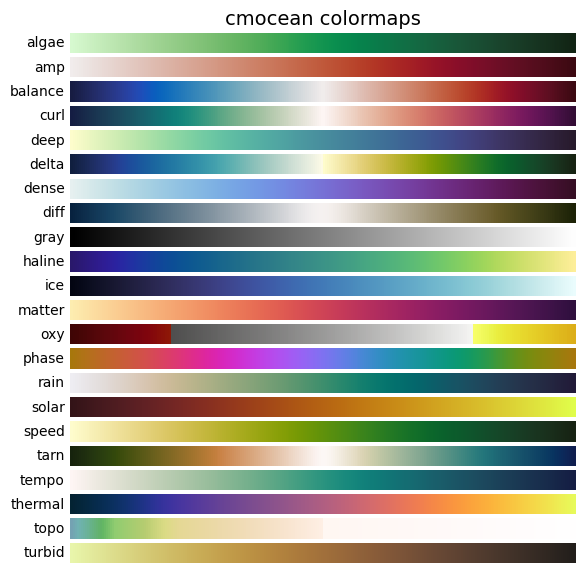

In [17]:
cmap_list = [i for i in cmaps.cmocean.names if not i.endswith("_r")]
plot_color_gradients("cmocean", cmap_list)
print(cmap_list)

### colorcet colormaps

['colorwheel', 'bkr', 'bky', 'bwy', 'cwr', 'coolwarm', 'gwv', 'bjy', 'isolum', 'bgy', 'bgyw', 'kbc', 'blues', 'bmw', 'bmy', 'kgy', 'gray', 'dimgray', 'fire', 'kb', 'kg', 'kr', 'rainbow']


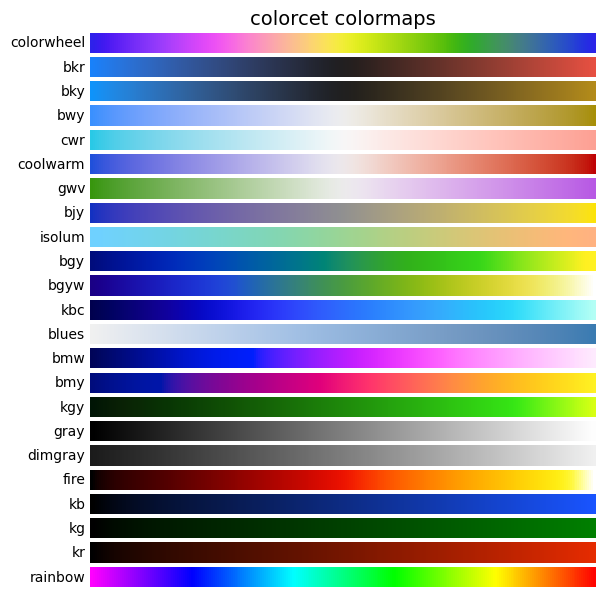

In [18]:
cmap_list = [i for i in cmaps.colorcet.names if not i.endswith("_r")]
plot_color_gradients("colorcet", cmap_list)
print(cmap_list)